In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Carregar arquivo
df_colesterol = pd.read_csv('./datasets/colesterol.csv')

In [4]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [5]:
# Remover colunas ID - irrelevante para EDA e modelo
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [6]:
# Renomear colunas
df_colesterol.columns = [
    'grupo_sanguineo',
    'fumante',
    'atividade_fisica',
    'idade',
    'peso',
    'altura',
    'colesterol'
]

In [7]:
# Criar copia de DF para eda
df_colesterol_eda = df_colesterol.copy()

In [8]:
# Criar copia de para bucketing
df_colesterol_bucketing = df_colesterol.copy()

## EDA

### Transformar Dados

In [9]:
# Visualizar dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [10]:
df_colesterol_eda.atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [11]:
# Detectar valor ausentes de cada coluna
df_colesterol_eda.isna().sum()

grupo_sanguineo     4
fumante             3
atividade_fisica    4
idade               3
peso                3
altura              3
colesterol          0
dtype: int64

In [12]:
# Medidas estatísticas do df
df_colesterol_eda.describe()

,idade,peso,altura,colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [13]:
# Coletar medidas das variaveis categoricas
moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_ativ_fisica = df_colesterol_eda.atividade_fisica.mode()

In [14]:
# Coletar medidas das variaveis numericas
mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [15]:
# Inputar valores coletados nos valores ausentes
df_colesterol_eda.fillna(
    value= {
        'grupo_sanguineo': moda_grupo_sanguineo[0],
        'fumante': moda_fumante[0],
        'atividade_fisica' : moda_ativ_fisica[0],
        'idade': mediana_idade,
        'peso': mediana_peso,
        'altura' : mediana_altura
    },
    inplace=True
)

In [16]:
# Alterar tipo da variável
df_colesterol_eda['altura'] = df_colesterol_eda['altura'].astype(int) 
df_colesterol_eda['idade'] = df_colesterol_eda['idade'].astype(int) 

In [17]:
# Nova estrutura do df - idade e altura estão como int
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   grupo_sanguineo   1000 non-null   object 
 1   fumante           1000 non-null   object 
 2   atividade_fisica  1000 non-null   object 
 3   idade             1000 non-null   int64  
 4   peso              1000 non-null   float64
 5   altura            1000 non-null   int64  
 6   colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [18]:
# Visualizar dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,atividade_fisica,idade,peso,altura,colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


### Analise de Outliers

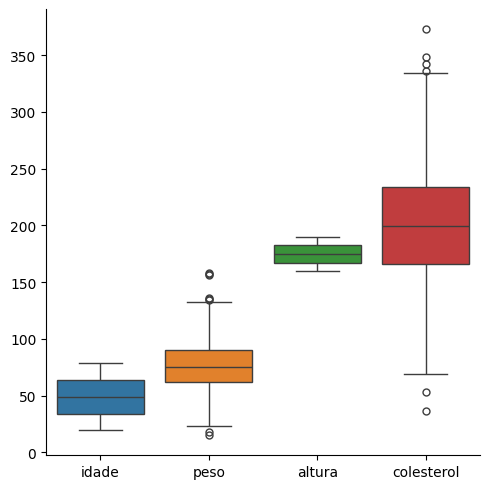

In [19]:
# Verificar/detectar outliers
sns.catplot(
    data=df_colesterol_eda,
    kind="box"
)

In [20]:
# Vamos remover os outliers, já que no caso da variável peso, parecem ser inputs errados, valores muito baixos
# Filtrar publico a ser removido
df_colesterol_eda[df_colesterol_eda.peso < 40].count()


grupo_sanguineo     37
fumante             37
atividade_fisica    37
idade               37
peso                37
altura              37
colesterol          37
dtype: int64

In [21]:
# Remover esse publico do df
df_colesterol_eda.drop(
    df_colesterol_eda[df_colesterol_eda.peso < 40].index,
    axis=0,
    inplace=True
)

### Boxplot

<Axes: xlabel='grupo_sanguineo', ylabel='colesterol'>

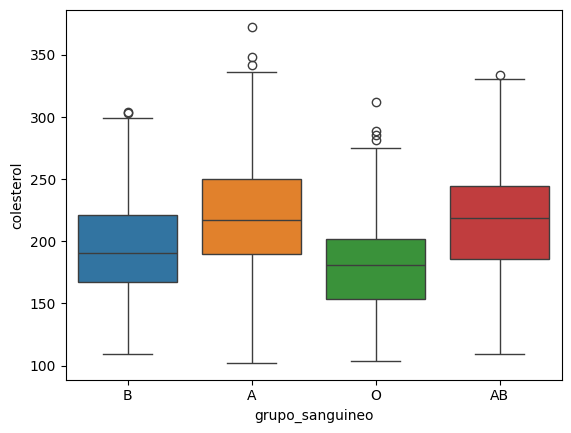

In [22]:
# Cruzar variáveis categoricas com o colesterol
sns.boxplot(data=df_colesterol_eda, x='grupo_sanguineo', y='colesterol', hue='grupo_sanguineo')

<Axes: xlabel='fumante', ylabel='colesterol'>

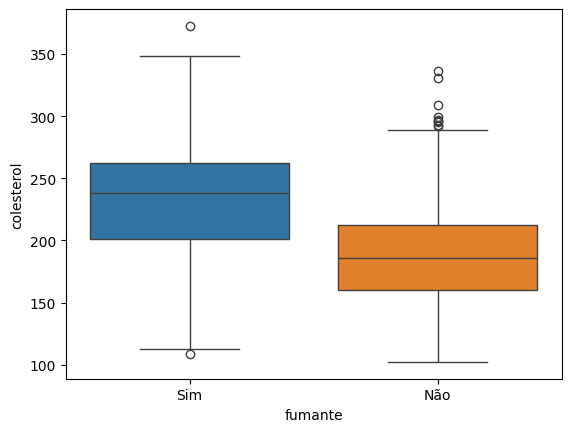

In [23]:
sns.boxplot(data=df_colesterol_eda, x='fumante', y='colesterol', hue='fumante')

<Axes: xlabel='atividade_fisica', ylabel='colesterol'>

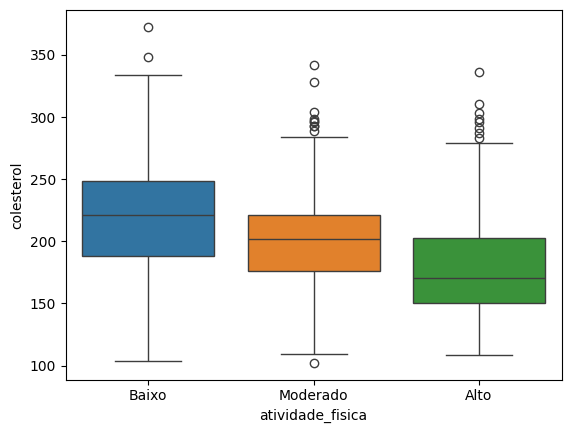

In [24]:
sns.boxplot(data=df_colesterol_eda, x='atividade_fisica', y='colesterol', hue='atividade_fisica')

### Scatter

<Axes: xlabel='idade', ylabel='colesterol'>

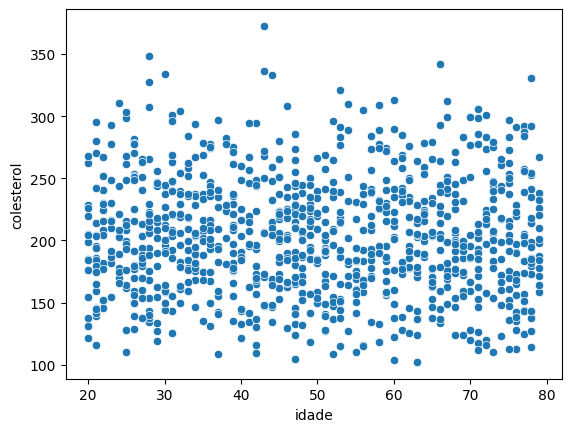

In [25]:
# Cruzar variaveis númericas com o colesterol
sns.scatterplot(data=df_colesterol_eda, x='idade', y='colesterol')

<Axes: xlabel='peso', ylabel='colesterol'>

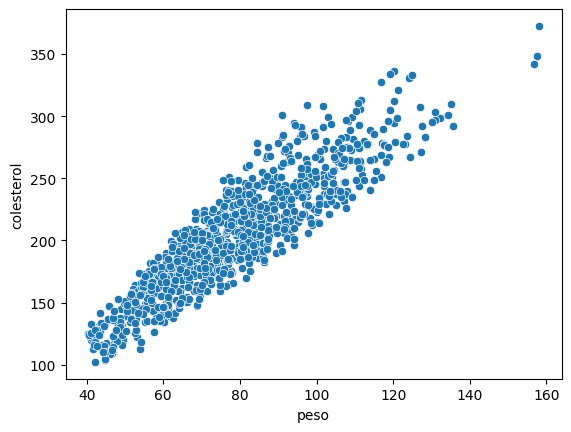

In [26]:
sns.scatterplot(data=df_colesterol_eda, x='peso', y='colesterol')

<Axes: xlabel='altura', ylabel='colesterol'>

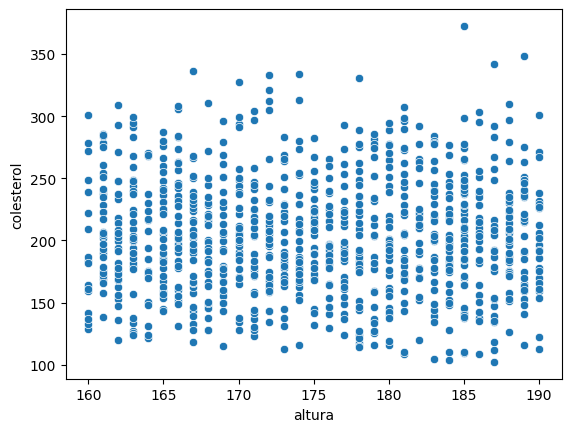

In [27]:
sns.scatterplot(data=df_colesterol_eda, x='altura', y='colesterol')

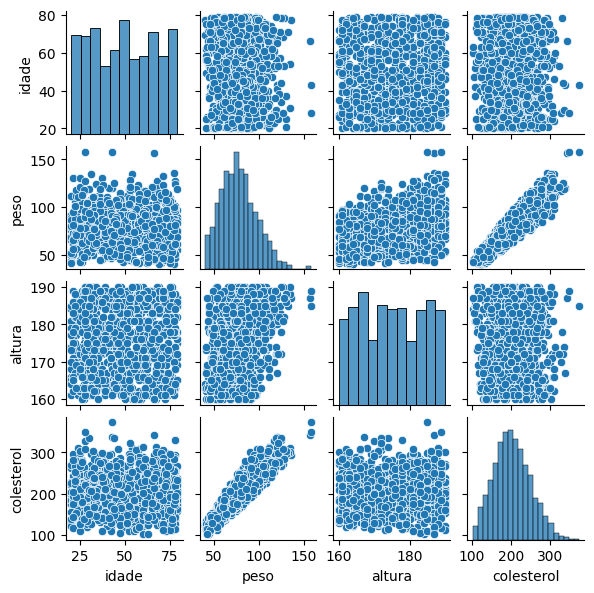

In [28]:
# Distribuição das variáveis númericas - Histograma
sns.pairplot(df_colesterol_eda, height=1.5)

### Correlação

In [29]:
# Transformar variaveis nominais/categoricas em variáveis númericas, usando One-Hot encoder do Pandas
df_colesterol_eda = pd.get_dummies(df_colesterol_eda, columns=['grupo_sanguineo', 'fumante'],  dtype='int64')

In [30]:
df_colesterol_eda.head(10)

,atividade_fisica,idade,peso,altura,colesterol,grupo_sanguineo_A,grupo_sanguineo_AB,grupo_sanguineo_B,grupo_sanguineo_O,fumante_Não,fumante_Sim
0,Baixo,33,85.1,186,199.63,0,0,1,0,0,1
1,Moderado,68,105.0,184,236.98,1,0,0,0,1,0
2,Alto,25,64.8,180,161.79,0,0,0,1,1,0
3,Alto,43,120.2,167,336.24,1,0,0,0,1,0
4,Baixo,79,88.5,175,226.23,0,1,0,0,1,0
5,Baixo,68,66.8,170,185.31,0,0,1,0,1,0
6,Baixo,60,117.3,181,289.33,1,0,0,0,0,1
7,Moderado,35,86.9,174,216.48,0,0,0,1,0,1
8,Baixo,62,81.3,166,235.30,0,0,0,1,1,0
10,Baixo,57,123.6,183,283.87,1,0,0,0,0,1


In [31]:
# transformar a variavel atividade_fisica ordinal em numerica, usando factorize do Pandas
df_colesterol_eda['atividade_fisica'] = pd.factorize(df_colesterol_eda.atividade_fisica)[0] + 1

<Axes: >

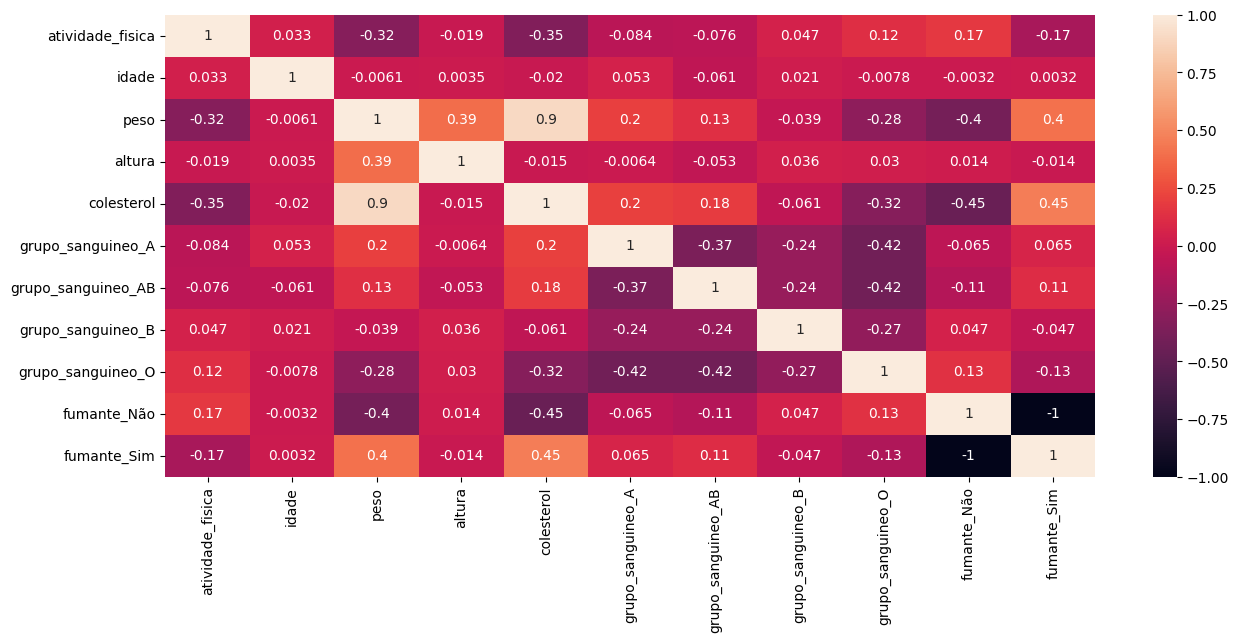

In [32]:
# Mapa de calor com Correlação de variaveis
plt.figure(figsize=(15,6))
sns.heatmap(df_colesterol_eda.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

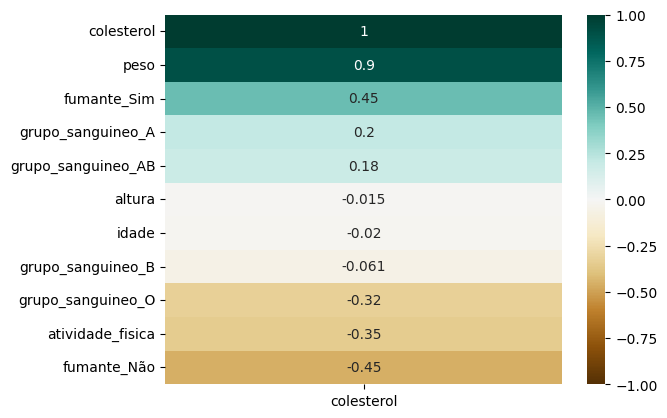

In [33]:
# formato de ranking, somente correlacao com a variável target(colesterol)
sns.heatmap(df_colesterol_eda.corr()[['colesterol']].sort_values(by='colesterol', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

### Bucketing
Faixa de valores (bin)

In [34]:
# Bucketing de idade
bins_idade = [20, 30, 40, 50, 60, 70, 80]
labels_idade = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df_colesterol_bucketing['faixa_idade'] = pd.cut(x = df_colesterol_bucketing['idade'], bins=bins_idade, labels=labels_idade, include_lowest=True)

In [35]:
df_colesterol_bucketing.head(10)

,grupo_sanguineo,fumante,atividade_fisica,idade,peso,altura,colesterol,faixa_idade
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49


<Axes: xlabel='faixa_idade', ylabel='colesterol'>

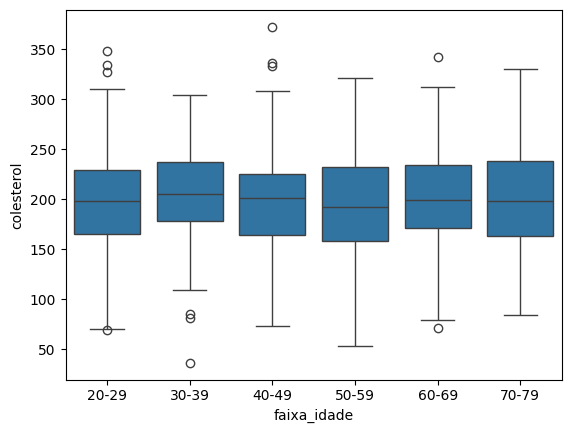

In [36]:
sns.boxplot(df_colesterol_bucketing, x='faixa_idade', y='colesterol')

In [37]:
# Bucketing de idade
bins_peso = [40, 60, 80, 100, 120, 140, 160]
labels_peso = ['40-59',  '60-79',  '80-99',  '100-119',  '120-139',  '140-159']
df_colesterol_bucketing['faixa_peso'] = pd.cut(x = df_colesterol_bucketing['peso'], bins=bins_peso, labels=labels_peso, include_lowest=True)

In [38]:
df_colesterol_bucketing.head(20)

,grupo_sanguineo,fumante,atividade_fisica,idade,peso,altura,colesterol,faixa_idade,faixa_peso
0,B,Sim,Baixo,33.0,85.1,186.0,199.63,30-39,80-99
1,A,Não,Moderado,68.0,105.0,184.0,236.98,60-69,100-119
2,O,Não,Alto,25.0,64.8,180.0,161.79,20-29,60-79
3,A,Não,Alto,43.0,120.2,167.0,336.24,40-49,120-139
4,AB,Não,Baixo,79.0,88.5,175.0,226.23,70-79,80-99
5,B,Não,Baixo,68.0,66.8,170.0,185.31,60-69,60-79
6,A,Sim,Baixo,60.0,117.3,181.0,289.33,50-59,100-119
7,O,Sim,Moderado,35.0,86.9,174.0,216.48,30-39,80-99
8,O,Não,Baixo,62.0,81.3,166.0,235.30,60-69,80-99
9,B,Sim,Alto,44.0,32.7,165.0,97.79,40-49,NaN


<Axes: xlabel='faixa_peso', ylabel='colesterol'>

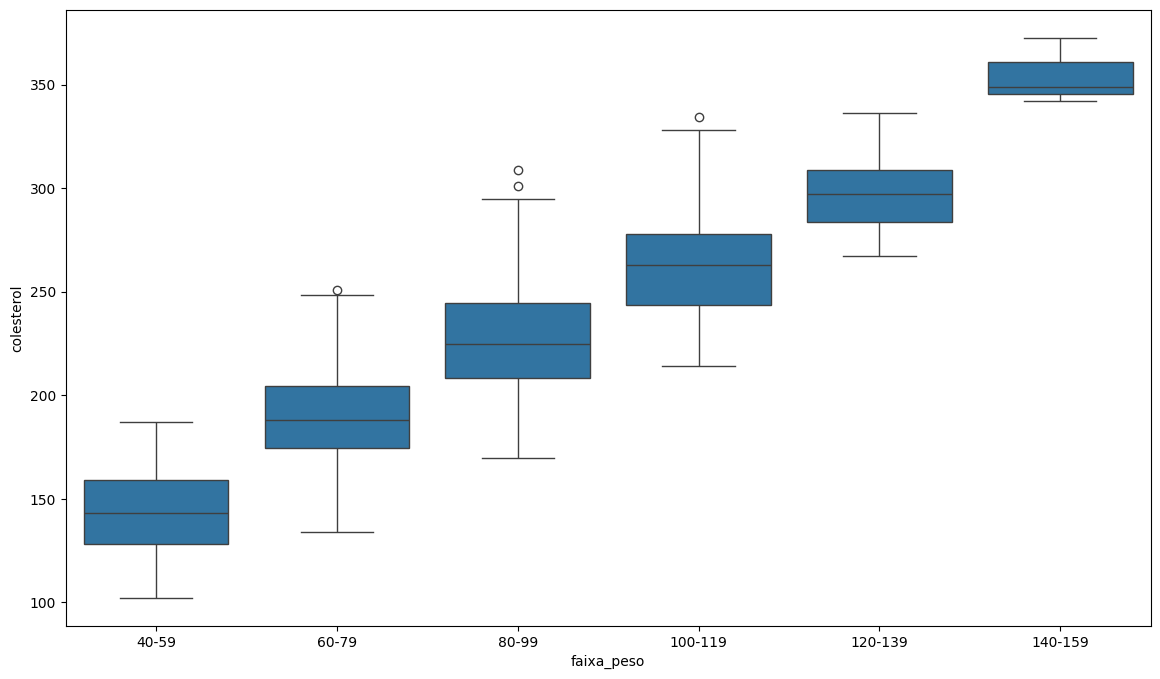

In [39]:
plt.figure(figsize=(14,8))
sns.boxplot(df_colesterol_bucketing, x='faixa_peso', y='colesterol')

## Modelo

### Import e transformação

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [41]:
# Criar Dataset de Treino e Teste
df_colesterol.drop(
    df_colesterol[df_colesterol.peso < 40].index,
    axis=0,
    inplace=True
)

In [42]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   grupo_sanguineo   960 non-null    object 
 1   fumante           960 non-null    object 
 2   atividade_fisica  959 non-null    object 
 3   idade             960 non-null    float64
 4   peso              960 non-null    float64
 5   altura            960 non-null    float64
 6   colesterol        963 non-null    float64
dtypes: float64(4), object(3)
memory usage: 60.2+ KB


In [43]:
X = df_colesterol.drop(columns='colesterol', axis=1)
y = df_colesterol['colesterol']

In [44]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [45]:
y_train.shape

(674,)

### Pipeline

In [46]:
# Imputar moda nas varáveis categoricas - grupo_sanguineo, fumante, atividade_fisica
# Padronizar variáveis númericas - idade, altura, peso
# OneHotEncode nas variaveis categoricas nominas - grupo_sanguineo, fumante
# OrdinalEncode nas variáveis categoricas ordinais - atividade_fisica
# Imputar mediana nas variáveis númerica nulas - idade, altura, peso

# Nomes das Colunas
col_categoricas = ['grupo_sanguineo', 'fumante']
col_numericas = ['idade', 'altura', 'peso']
col_ordinais = ['atividade_fisica']

In [47]:
# Pipeline de transformação
# Transformer Categoricas
transformer_categorias = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [48]:
# Transformer Ordinais
transformer_ordinais = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(categories=[['Baixo', 'Moderado', 'Alto']], handle_unknown='error'))
    ]
)

In [49]:
# Transformer Numericas
transformer_numericas = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [50]:
# Transformer coluna - encapsula todos os transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numericas, col_numericas),
        ('ord', transformer_ordinais, col_ordinais),
        ('cat', transformer_categorias, col_categoricas)
    ]
)

In [51]:
# Pipeline principal = Pre Processamento + Treinamento
model_regr = Pipeline(
    steps=[
        ('preprocessos', preprocessor),
        ('regressor', LinearRegression())
    ]
)

In [52]:
# Treinar model
model_regr.fit(X_train, y_train)

Pipeline(steps=[('preprocessos',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['idade', 'altura', 'peso']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Baixo',
                                                                                               'Moderado',
                                                                                               'Alto']]))]),
                                                  ['atividade_fisica']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grupo_sanguineo',
                                                   'fumante'])])),
                ('regressor', LinearRegression())])

### Análise de Métricas

In [53]:
# Calcular Predição
y_pred = model_regr.predict(X_test)

In [54]:
# Calcular R2 Score - quanto mais proximo de 1, melhor
r2_score(y_test, y_pred)

0.9594250724093464

In [55]:
# Calcular MAE
mean_absolute_error(y_test, y_pred)

np.float64(7.313838031022507)

In [56]:
# Calcular RMSE
root_mean_squared_error(y_test, y_pred)

np.float64(9.097649246487036)

### Residuos

In [57]:
# Calcular residuos
residuos = y_test - y_pred

In [58]:
# Transformar os residuos na escala padrão
# (X - media) / desvio padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

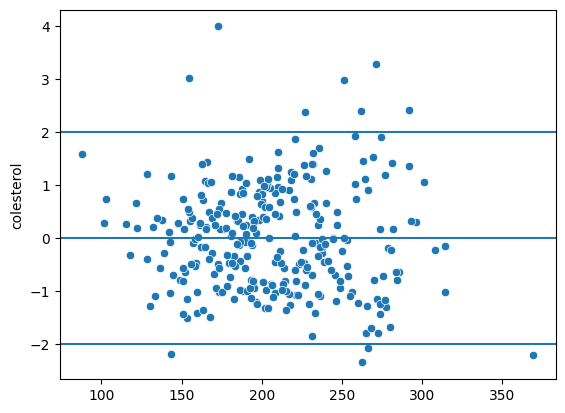

In [59]:
# Verificar linearidade dos resíduos: valores estao entre -2 e 2
# Verificar homocedasticidade: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(0)
plt.axhline(y=-2)
plt.axhline(y=2)


Text(0, 0.5, 'Resíduos na escala padrão')

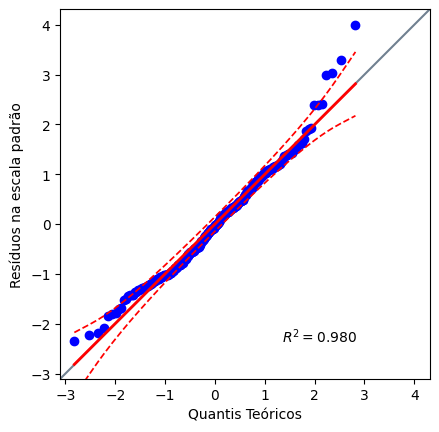

In [60]:
# Verificar normalidade dos residuos
# QQplot
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')

### Resíduos - Testes estatísticos
p-value < 0,05 - rejeita h0

In [61]:
# Teste de Normalidade de Shapiro-Wilk
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [62]:
stat_shapiro, p_value_shapiro = shapiro(residuos)
print("Estatística do Teste: {} e P-Value: {}".format(stat_shapiro, p_value_shapiro))

Estatística do Teste: 0.9807737729720739 e P-Value: 0.0006268860444492424


In [63]:
# Teste de Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print("Estatística do Teste: {} e P-Value: {}".format(stat_ks, p_value_ks))

Estatística do Teste: 0.42455920998485785 e P-Value: 8.925833190901912e-48


In [64]:
# Teste de Lilliefors
stat_lf, p_value_lf = lilliefors(residuos, dist='norm', pvalmethod='table')
print("Estatística do Teste: {} e P-Value: {}".format(stat_lf, p_value_lf))

Estatística do Teste: 0.04955371030192851 e P-Value: 0.125333237207372


In [65]:
# Teste de Anderson-Darling
stat_and, critical_and, significance_table = anderson(residuos, dist='norm')


In [66]:
critical_and

array([0.568, 0.647, 0.776, 0.906, 1.077])

In [67]:
significance_table

array([15. , 10. ,  5. ,  2.5,  1. ])

In [68]:
# Estatística maior que valor crítico: rejeita H0 -> não apresentam uma distribuição normal
print("Estatística do Teste: {} e Valor Crítico: {}".format(stat_and, critical_and[2]))

Estatística do Teste: 0.9169275158490109 e Valor Crítico: 0.776


#### Teste de Homocedasticidade de Goldfeld-Quandt

In [69]:
pipe = Pipeline(
    steps=[
        ('preprocessos', preprocessor)
    ]
)

X_test_transformed = pipe.fit_transform(X_test)

In [70]:
X_test_transformed

array([[-1.44340738, -0.58669129,  0.22608781, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.28157488, -1.05685776, -1.20886474, ...,  1.        ,
         1.        ,  0.        ],
       [-1.10973608, -0.35160806, -0.84754575, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.00250157, -1.52702423, -1.09014564, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.28056099, -0.35160806,  0.17447081, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.72545605, -1.17439938, -1.65277092, ...,  1.        ,
         0.        ,  1.        ]])

In [71]:
test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld = test_goldfeld[0]
p_value_goldfeld = test_goldfeld[1]
print("Estatística do Teste: {} e P-Value: {}".format(stat_goldfeld, p_value_goldfeld))

Estatística do Teste: 0.6716135765253545 e P-Value: 0.9893959472385482


### Realizar predições individuais

In [81]:
predicao_individual = {
    'grupo_sanguineo': 'O',
    'fumante': 'Não',
    'atividade_fisica': 'Alto',
    'idade': 40,
    'peso': 70,
    'altura': 180
}

sample_df = pd.DataFrame(predicao_individual, index=[1])

In [73]:
sample_df

,grupo_sanguineo,fumante,atividade_fisica,idade,peso,altura
1,O,Não,Alto,40,70,180


In [83]:
model_regr.predict(sample_df)

array([165.32375099])

In [82]:
# Salvar modelo
import joblib
joblib.dump(model_regr, './modelo_colesterol.pkl')

['./modelo_colesterol.pkl']